<a href="https://colab.research.google.com/github/sushankindroji/lifeexpectancy-ml-model/blob/main/LifeExpectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Importing libraries**

In [ ]:
#for cleaning and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for Source Identification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

#for modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

# **Data collection**

dataset url:https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated/data

In [ ]:
df=pd.read_csv("Life-Expectancy-Data-Updated.csv")
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


#**Data Cleaning and Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

**Drop the Duplicates**

In [ ]:
df.shape

(2864, 21)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(2864, 21)

Before droping and after droping the duplicates the data set has same shape so no duplicates are
there in the dataset.

**Check the NULL Values**

In [ ]:
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

There is no NULL values in the given dataset.

In [ ]:
zero_columns = [col for col in df.columns if (df[col] == 0).any()]

print("Columns containing at least one zero:", zero_columns)

Columns containing at least one zero: ['Alcohol_consumption', 'Economy_status_Developed', 'Economy_status_Developing']


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2864.0,2007.500000,4.610577,2000.000,2003.75000,2007.5000,2011.250000,2015.0000
Infant_deaths,2864.0,30.363792,27.538117,1.800,8.10000,19.6000,47.350000,138.1000
Under_five_deaths,2864.0,42.938268,44.569974,2.300,9.67500,23.1000,66.000000,224.9000
Adult_mortality,2864.0,192.251775,114.910281,49.384,106.91025,163.8415,246.791375,719.3605
Alcohol_consumption,2864.0,4.820882,3.981949,0.000,1.20000,4.0200,7.777500,17.8700
Hepatitis_B,2864.0,84.292598,15.995511,12.000,78.00000,89.0000,96.000000,99.0000
Measles,2864.0,77.344972,18.659693,10.000,64.00000,83.0000,93.000000,99.0000
BMI,2864.0,25.032926,2.193905,19.800,23.20000,25.5000,26.400000,32.1000
Polio,2864.0,86.499651,15.080365,8.000,81.00000,93.0000,97.000000,99.0000
Diphtheria,2864.0,86.271648,15.534225,16.000,81.00000,93.0000,97.000000,99.0000


#**Exploratory Data Analysis (EDA)**

**Heatmap**

<Axes: >

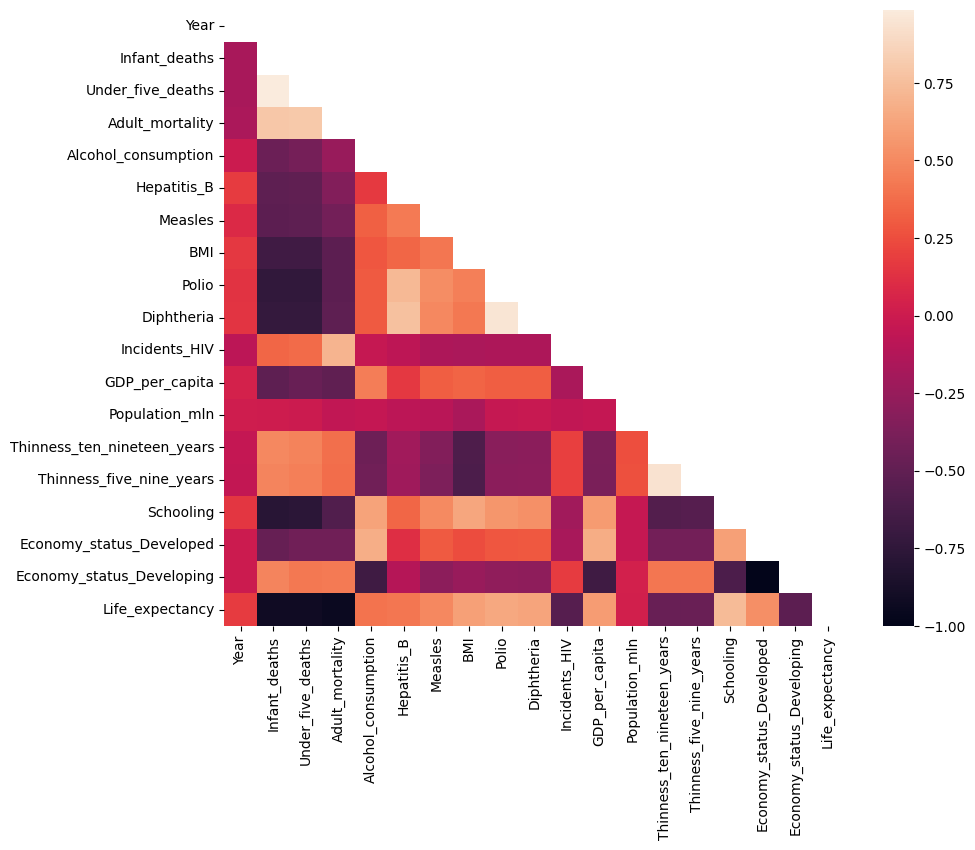

In [ ]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
corr=numerical_df.corr()
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask)

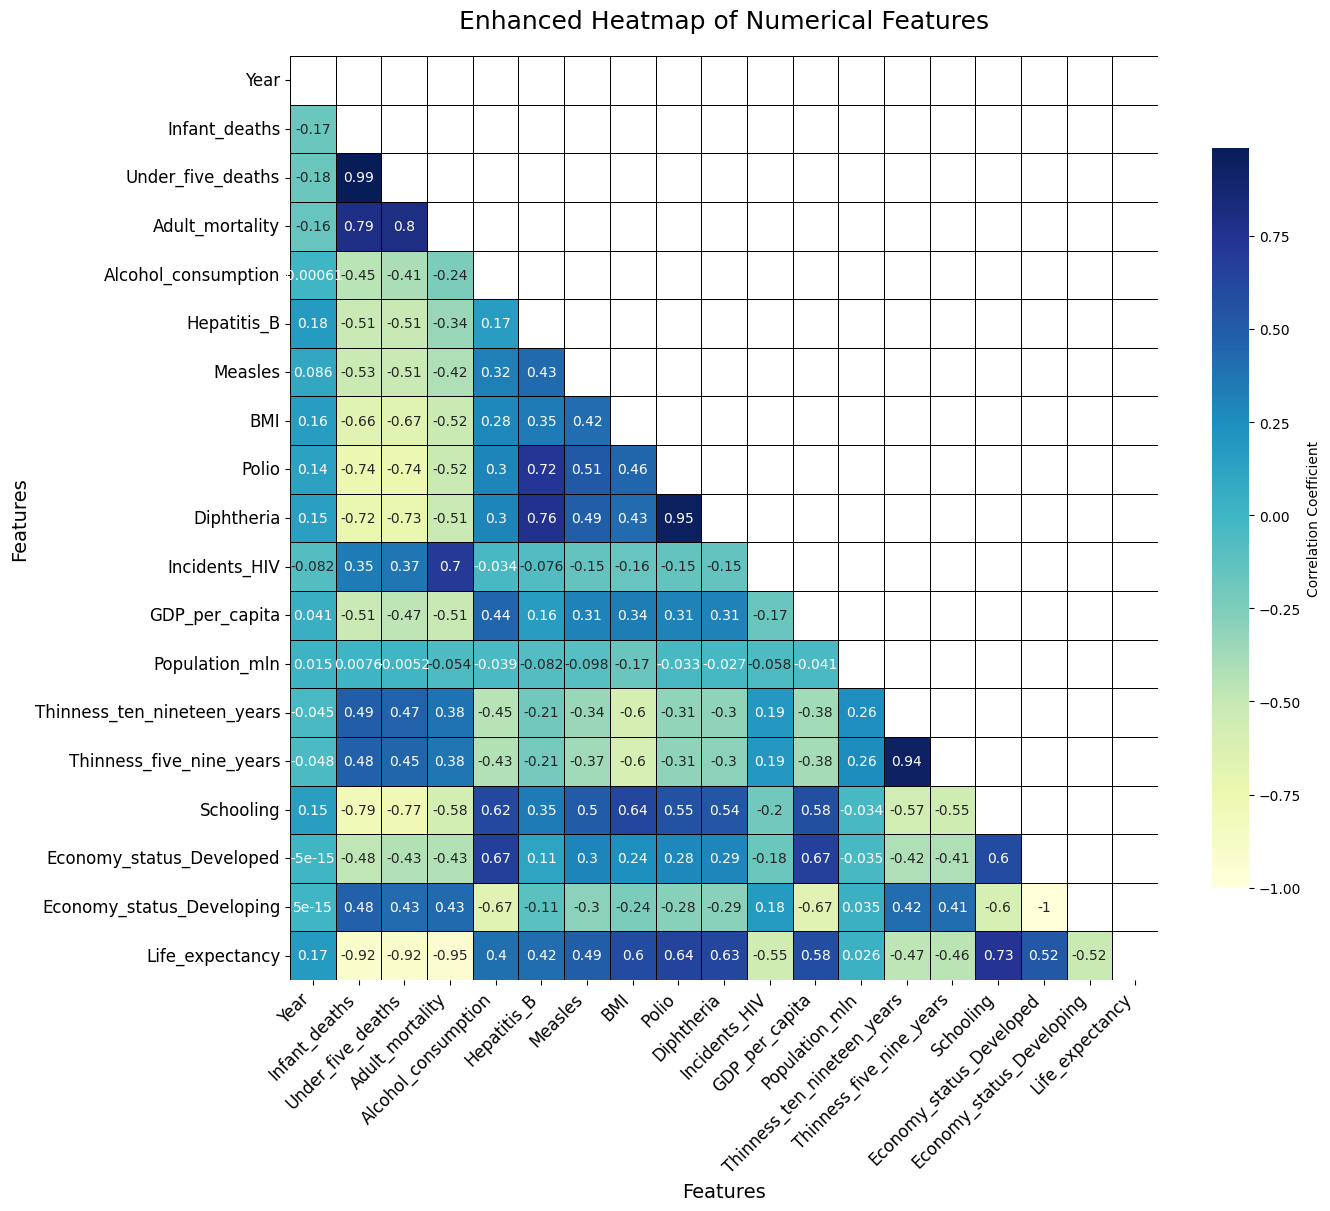

In [ ]:
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(numerical_df.corr(),
                      annot=True,
                      cmap='YlGnBu',
                      linewidths=.5,
                      linecolor='black',
                      annot_kws={"size": 10},
                      cbar_kws={"shrink": .8, "label": "Correlation Coefficient"},
                      mask=np.triu(np.ones_like(numerical_df.corr()))
                      )

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.title('Enhanced Heatmap of Numerical Features', fontsize=18, pad=20)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.show()

We can see high corelation between couple of features, therefore there is no need to keep all af them as their impact will be explained by another feature.

* Infants death and under five deaths by adult mortality

* Diphteria by polio

* Thinness 5-9 years by thinness 10-19 years





**Trend of life expectancy over the years**

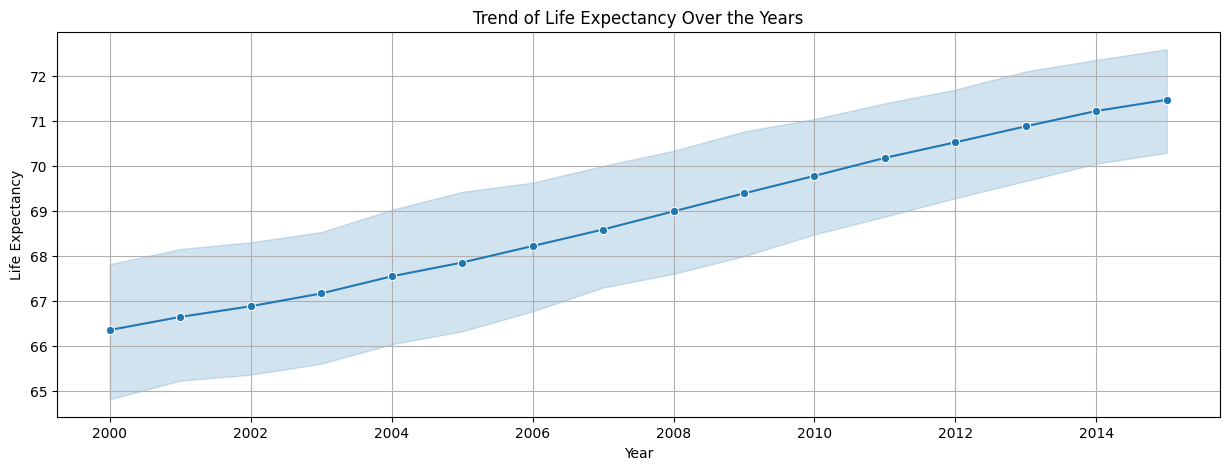

In [ ]:
plt.figure(figsize=(15,5))

sns.lineplot(x = 'Year', y = 'Life_expectancy', data =df, marker = 'o')
plt.grid()
plt.title('Trend of Life Expectancy Over the Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

<ipython-input-13-a7d6cf2c35f8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Region'], y=df['Life_expectancy'], data=df, palette='Paired')


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Middle East'),
  Text(1, 0, 'European Union'),
  Text(2, 0, 'Asia'),
  Text(3, 0, 'South America'),
  Text(4, 0, 'Central America and Caribbean'),
  Text(5, 0, 'Rest of Europe'),
  Text(6, 0, 'Africa'),
  Text(7, 0, 'Oceania'),
  Text(8, 0, 'North America')])

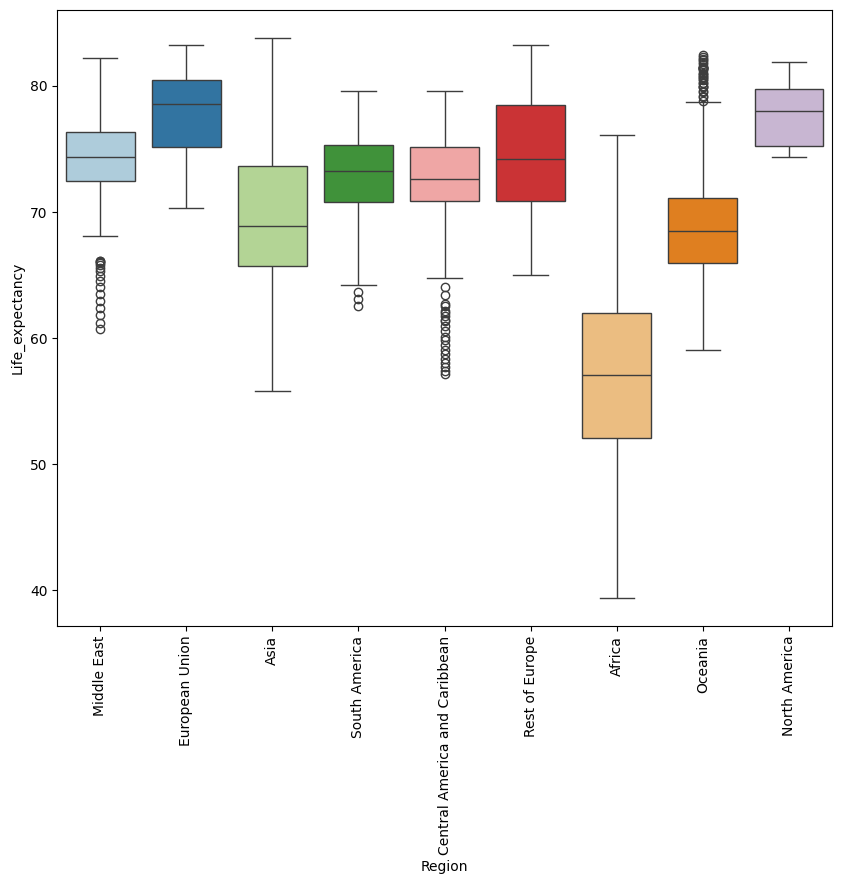

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x=df['Region'], y=df['Life_expectancy'], data=df, palette='Paired')
plt.xticks(rotation = 90)

Average life expectancy of countries and regions around the world tend to increase each year. However, we can clearly see that regions like Africa, although Life Expectancy have increased, are still very low compared to the world average.

**scatterplots for various features affecting life expectancy**


In [ ]:
numerical_column=list(numerical_df.columns)
numerical_column.remove("Life_expectancy")
numerical_column.remove("Year")
numerical_column.remove("Economy_status_Developed")
numerical_column.remove("Economy_status_Developing")

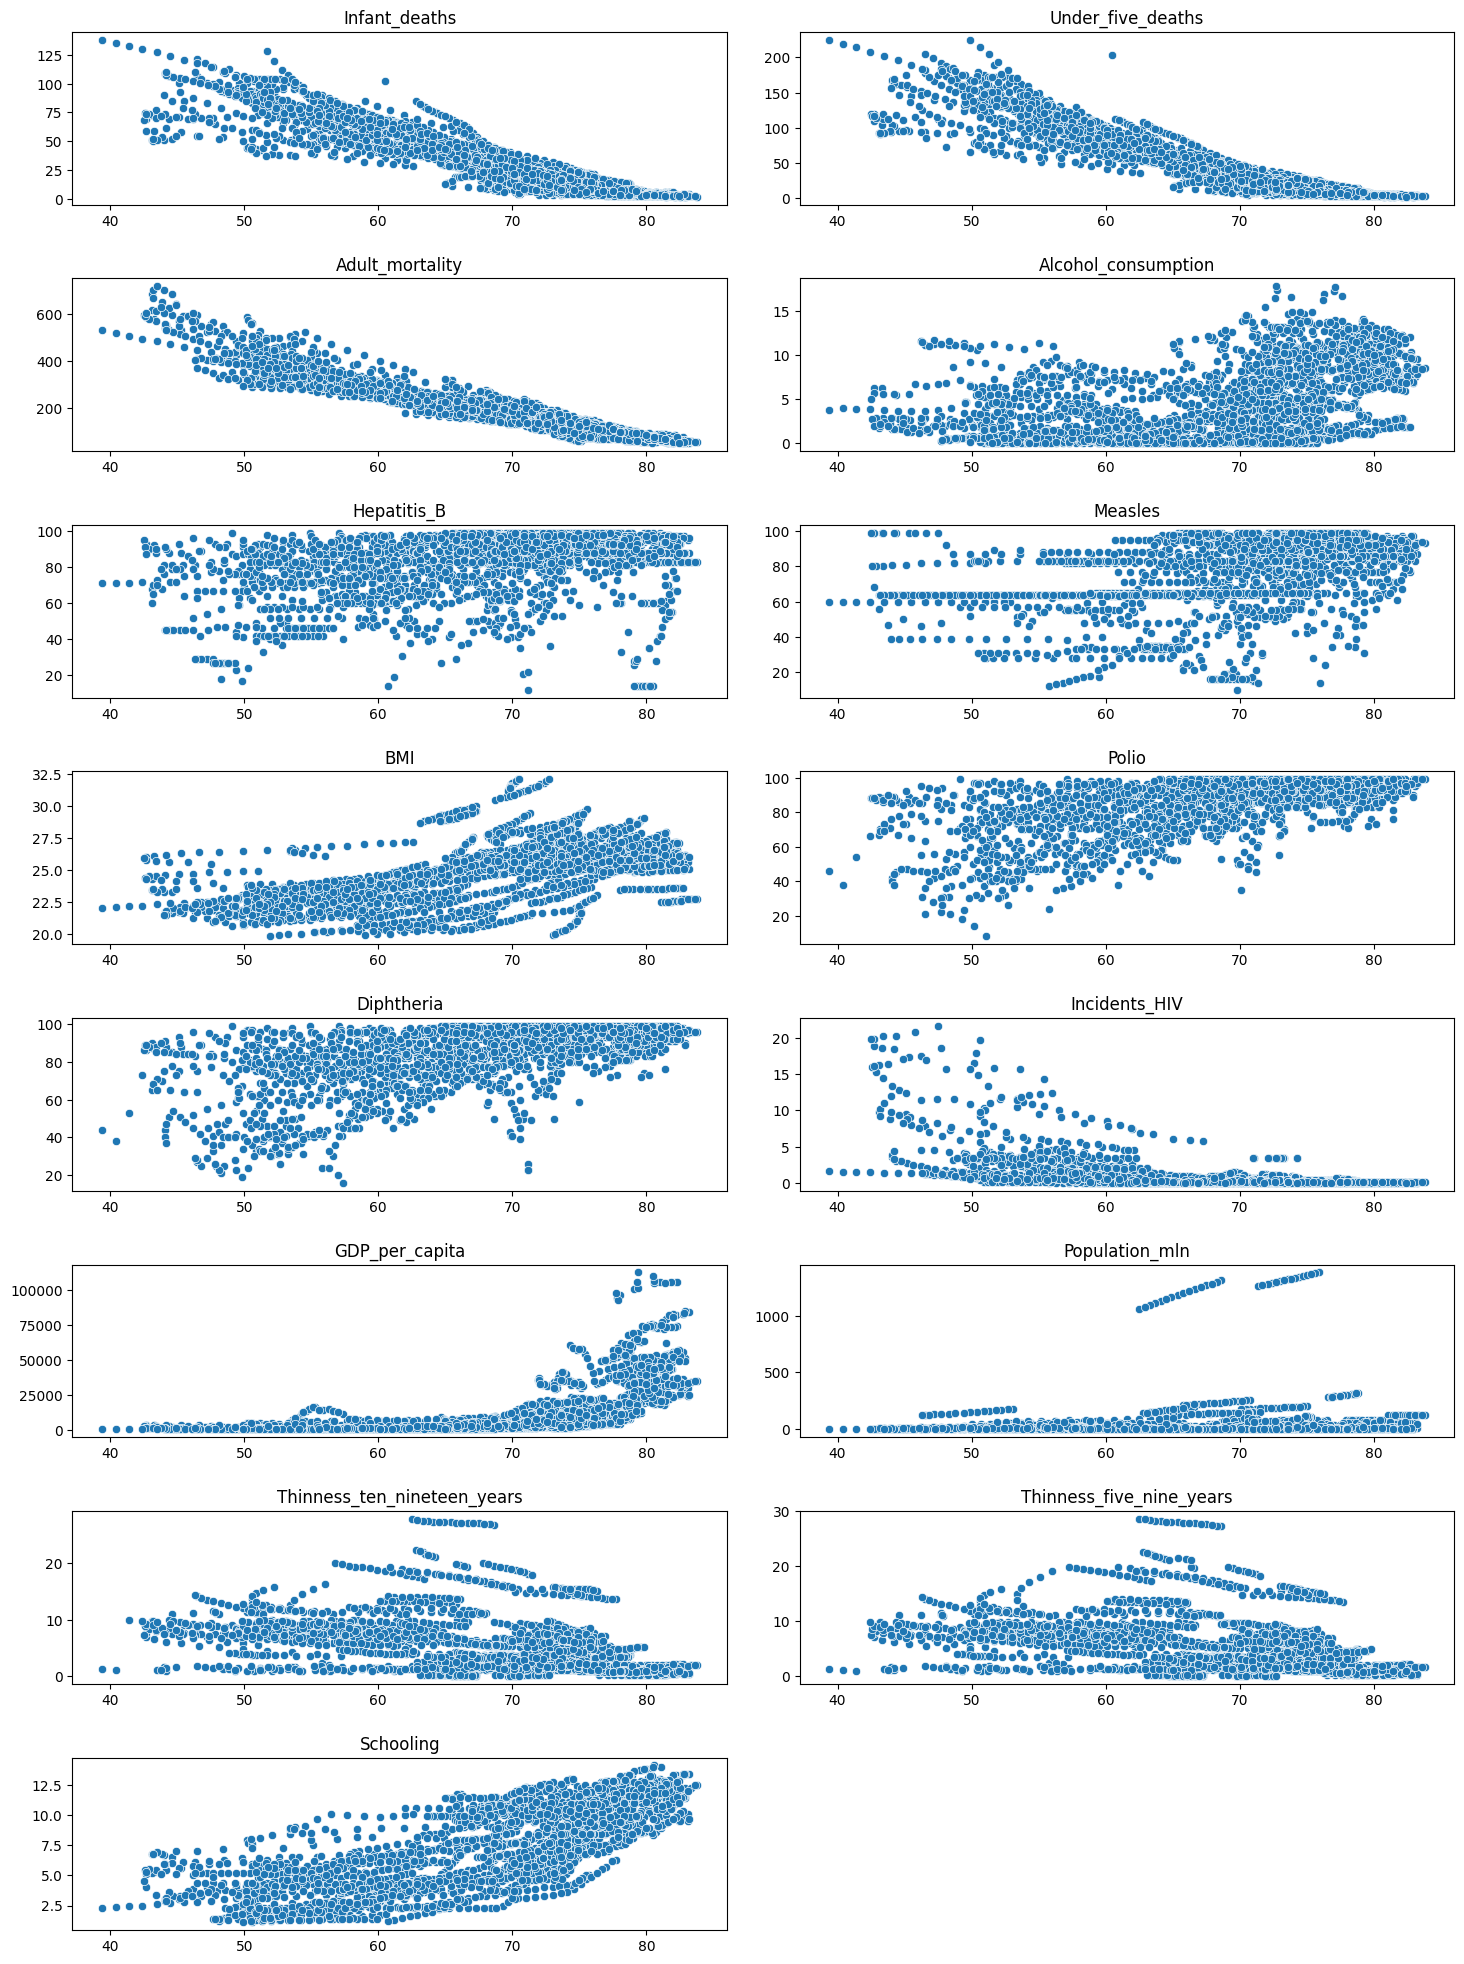

In [ ]:
plt.figure(figsize=(15, 20))
for index, col in enumerate(numerical_column):
    plt.subplot((len(numerical_column) + 1) // 2, 2, index + 1)

    sns.scatterplot(x = "Life_expectancy", y = col, data = df)

    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout(pad = 2)

plt.show()

<Axes: xlabel='Life_expectancy', ylabel='Count'>

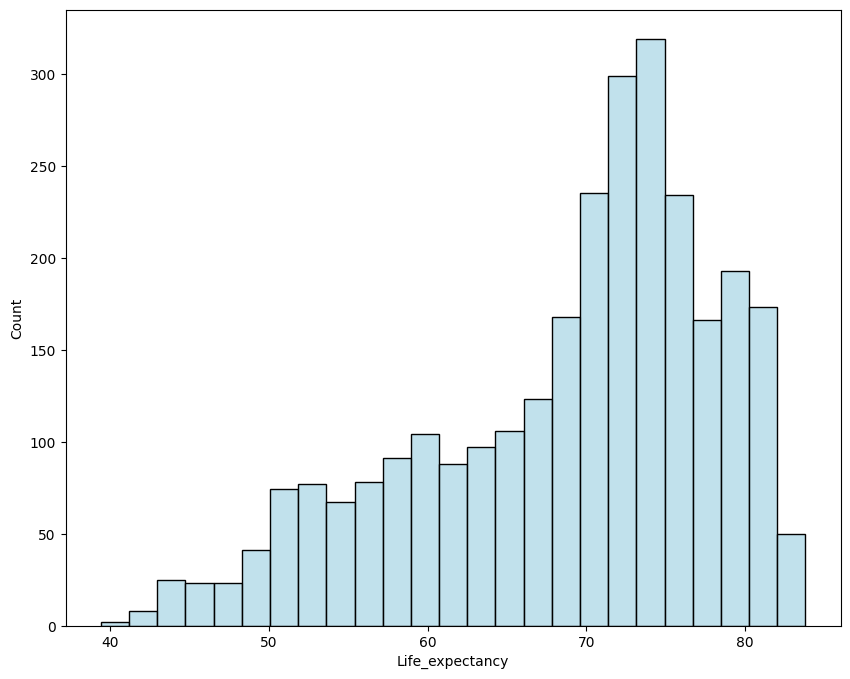

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(x='Life_expectancy', data=df,color='lightblue')

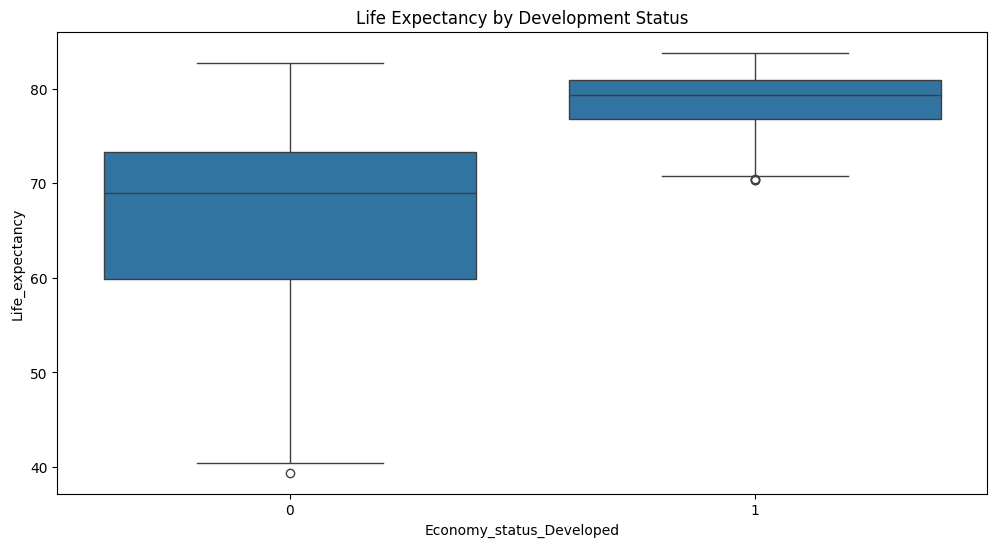

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Economy_status_Developed', y='Life_expectancy', data=df)
plt.title('Life Expectancy by Development Status')
plt.show()

From the preliminary analysis based on data exploration and visualization we can come across following conclusions:

* Unsurprisingly, a key factor influencing life expectancy in a given country is adult mortality
* Another important factor is schooling which can be understood as a representation of the welfare level in the country
* People in developed countries on average live longer than in developing countries
* Region with the lowest life expectancy and highest dispersion is Africa
* Life expectancy increased throughout the years
* On average we can observe higher alcohol consumption levels in developed countries than in developing
* In general immunization coverage level is correlated across different types of diseases, but we don't see in this field big advantages of developed countries, especially in Hepatitis B


#**Source Identification**
we are using
Recursive Feature Elimination (RFE) for source identification from dataset

In [ ]:
x = numerical_df.drop(columns=['Life_expectancy'])
y = numerical_df['Life_expectancy']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
rfe = RFE(model, n_features_to_select=2)
rfe.fit(x_train, y_train)

ranking = rfe.ranking_
selected_features = x.columns[rfe.support_]


print(f"Feature rankings: {ranking}")
print(f"Selected features: {selected_features}")


x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

model.fit(x_train_rfe, y_train)

r2 = model.score(x_test_rfe, y_test)
print(f"Model R-squared with selected features: {r2}")

Feature rankings: [ 8  2  1  1  9 14 11  7 15 12  6 10  3  5 13  4 17 16]
Selected features: Index(['Under_five_deaths', 'Adult_mortality'], dtype='object')
Model R-squared with selected features: 0.9709478977968562


#**Solution Development( Modelling )**

In [ ]:
x_train = df[['Year', 'Under_five_deaths', 'Adult_mortality', 'BMI', 'Diphtheria', 'Polio', 'Thinness_ten_nineteen_years', 'Schooling']]
y_train = df["Life_expectancy"]

In [ ]:
x_test = df[['Year', 'Under_five_deaths', 'Adult_mortality', 'BMI', 'Diphtheria', 'Polio', 'Thinness_ten_nineteen_years', 'Schooling']]
y_test = df["Life_expectancy"]

In [ ]:
Modeling = pd.DataFrame(columns=['Model', 'Training Score', 'Test R2 Score'])

def select_model(model_name):
    global Modeling

    model = model_name

    model.fit(x_train, y_train)

    train_score = model.score(x_train, y_train)
    print(f"Score of the {model_name} model on the training data is: {train_score}")

    predictions = np.round(model.predict(x_test), decimals = 1)

    test_r2_score = r2_score(y_test, predictions)
    print(f"R2 score of the {model_name} model on the test data is: {test_r2_score}")

    model_scores = pd.DataFrame({'Model': [model_name], 'Training Score': [train_score], 'Test R2 Score': [test_r2_score]})

    Modeling = pd.concat([Modeling, model_scores], ignore_index = True)

    return model

In [ ]:
lr = select_model(LinearRegression())

Score of the LinearRegression() model on the training data is: 0.9735771782797271
R2 score of the LinearRegression() model on the test data is: 0.9735641996840886


In [ ]:
select_model(RandomForestRegressor(n_estimators = 100, max_depth=7, min_samples_split=5))

Score of the RandomForestRegressor(max_depth=7, min_samples_split=5) model on the training data is: 0.9931268050521054
R2 score of the RandomForestRegressor(max_depth=7, min_samples_split=5) model on the test data is: 0.9931144847110954


RandomForestRegressor(max_depth=7, min_samples_split=5)

In [ ]:
names = ['LinearRegression', 'RandomForestRegressor']

for i in range(2):
    Modeling.rename(index = {i : names[i]}, inplace = True)

Modeling.drop(columns= "Model", inplace = True)

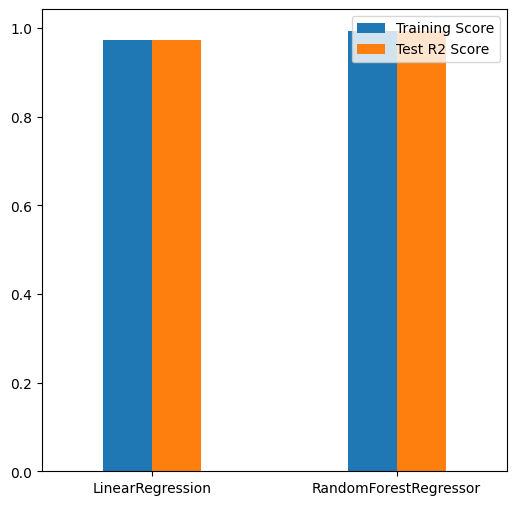

In [ ]:
Modeling.plot(kind = "bar", figsize = (6,6), width = 0.4)
plt.xticks(rotation = 0)
plt.show()

#**Testing**

In [ ]:
#linear regression

lr = LinearRegression()
lr.fit(x_train, y_train)

x_test = np.array([[2015, 13, 102, 27, 97, 98, 2, 8]])

y_test_lr = lr.predict(x_test)
print('Linear Regression - life expectancy is:', y_test_lr)

Linear Regression - life expectancy is: [75.57321241]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Random Forest Regressor

rnf = RandomForestRegressor(random_state=30)
rnf.fit(x_train, y_train)

y_test_rnf = rnf.predict(x_test)
print('Random Forest Regressor - life expectancy is:', y_test_rnf)

Random Forest Regressor - life expectancy is: [76.66]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
